In [1]:
import matplotlib.pyplot as plt
import mpl_lego as mplego
import numpy as np
import pandas as pd

from hate_target import keys
from mpl_lego.labels import bold_text

%matplotlib inline

In [2]:
n_groups = len(keys.target_groups)

In [3]:
mplego.style.use_latex_style()

In [4]:
data_path = "~/data/hatespeech/unfiltered_ratings.feather"

In [5]:
data = pd.read_feather(data_path)
n_samples = data.shape[0]

In [24]:
ruff = [pew for pew in data['predict_text'] if '[SLUR]' in pew]

In [34]:
ruff[40]

'[SLUR] bitch was making a little ass boy eat ha pussy and she got herpes and shit. Hoe needed her ass whooped'

In [6]:
agreement = data[['comment_id'] + keys.target_groups].groupby('comment_id').agg('mean')
is_target = agreement >= 0.5
group_counts = is_target.sum()

In [22]:
# Read in data
data = pd.read_feather(data_path)
comments = data[['comment_id', 'predict_text']].drop_duplicates().sort_values('comment_id')
# Determine target identities
agreement = data[['comment_id'] + keys.target_groups].groupby('comment_id').agg('mean')
agreement = agreement.reset_index(level=0).merge(right=comments, how='left')
# Extract data for training models
x = agreement['predict_text'].values
identities = agreement[sorted(keys.target_groups)]
y = [identities[col].values[..., np.newaxis] for col in identities]

In [23]:
y[5]

array([[0.8 ],
       [0.  ],
       [0.75],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [7]:
binarized = is_target.values.astype('int')

In [12]:
is_target.any(axis=1).sum()

30316

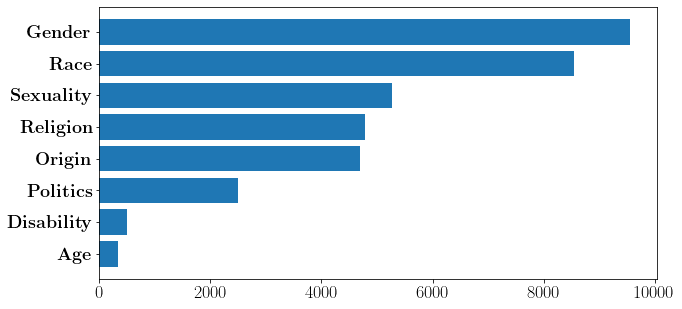

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

argsorted = np.argsort(group_counts.values)
sorted_labels = np.array(keys.target_labels)[argsorted]

ax.barh(np.arange(n_groups), group_counts[argsorted])
ax.set_yticks(np.arange(n_groups))
ax.set_yticklabels(sorted_labels)
mplego.labels.bold_axis_ticklabels(ax, 'y')
ax.tick_params(labelsize=18)

plt.savefig('counts', bbox_inches='tight')

In [9]:
group_counts.values / n_samples

array([0.02951491, 0.01651261, 0.01618125, 0.0329907 , 0.0181832 ,
       0.0011701 , 0.00173272, 0.00863598])

In [10]:
group_counts.sum()

36192

[Text(0, 0, 'Age'),
 Text(0, 1, 'Disability'),
 Text(0, 2, 'Politics'),
 Text(0, 3, 'Origin'),
 Text(0, 4, 'Religion'),
 Text(0, 5, 'Sexuality'),
 Text(0, 6, 'Race'),
 Text(0, 7, 'Gender')]

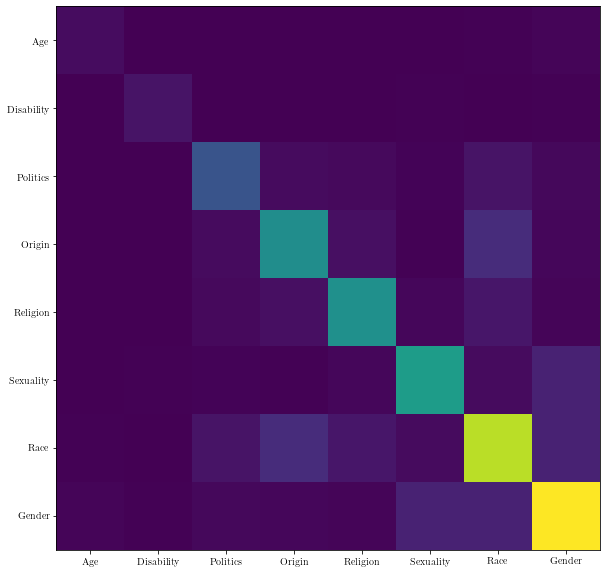

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

cross_counts = binarized[:, argsorted].T @ binarized[:, argsorted]

ax.imshow(cross_counts)
ax.set_xticks(np.arange(n_groups))
ax.set_xticklabels(sorted_labels)
ax.set_yticks(np.arange(n_groups))
ax.set_yticklabels(sorted_labels)

In [49]:
n_targets_per_comment = is_target.sum(axis=1)

In [55]:
n_targets_per_comment.value_counts().sort_index()

0    19754
1    25141
2     4556
3      546
4       67
5        5
8        1
dtype: int64

(array([32793.,   595.,  6578.,   384.,  1169.,  3647.,   237.,  2098.,
          807.,  1762.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

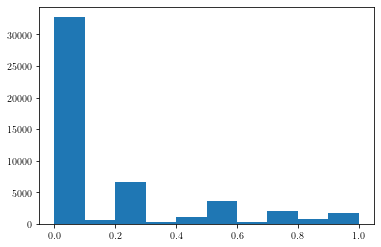

In [63]:
plt.hist(agreement['target_race'])